In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from env.wind_env import *
from env.wind.wind_map import *

In [2]:
start = (100, 900)
target = (800, 200)

wind_info_1 = {
    'number' : 1,
    'lengthscale' : 500,
    'info' : [
    [(5, 350),(5, 315),(10, 290),(10, 270),(15, 260),(15, 250),(15, 250)],
    [(5, 350),(10, 340),(10, 315),(10, 300),(15, 260),(15, 260),(15, 240)],
    [(5, 0),(5, 350),(10, 315),(10, 300),(15, 270),(15, 250),(15, 250)],
    [(5, 0),(5, 355),(10, 340),(10, 315),(15, 280),(10, 270),(15, 260)],
    [(5, 0),(5, 0),(10, 350),(5, 330),(5, 300),(15, 280),(15, 270)],
    [(5, 0),(5, 0),(5, 350),(5, 335),(5, 290),(10, 280),(15, 270)],
    [(5, 0),(5, 350),(5, 340),(5, 330),(5, 315),(10, 280),(15, 270)]
]
}
wind_info = wind_info_1['info']
wind_lengthscale = wind_info_1['lengthscale']

discrete_maps = get_discrete_maps(wind_info)
A = WindMap(discrete_maps, wind_lengthscale)

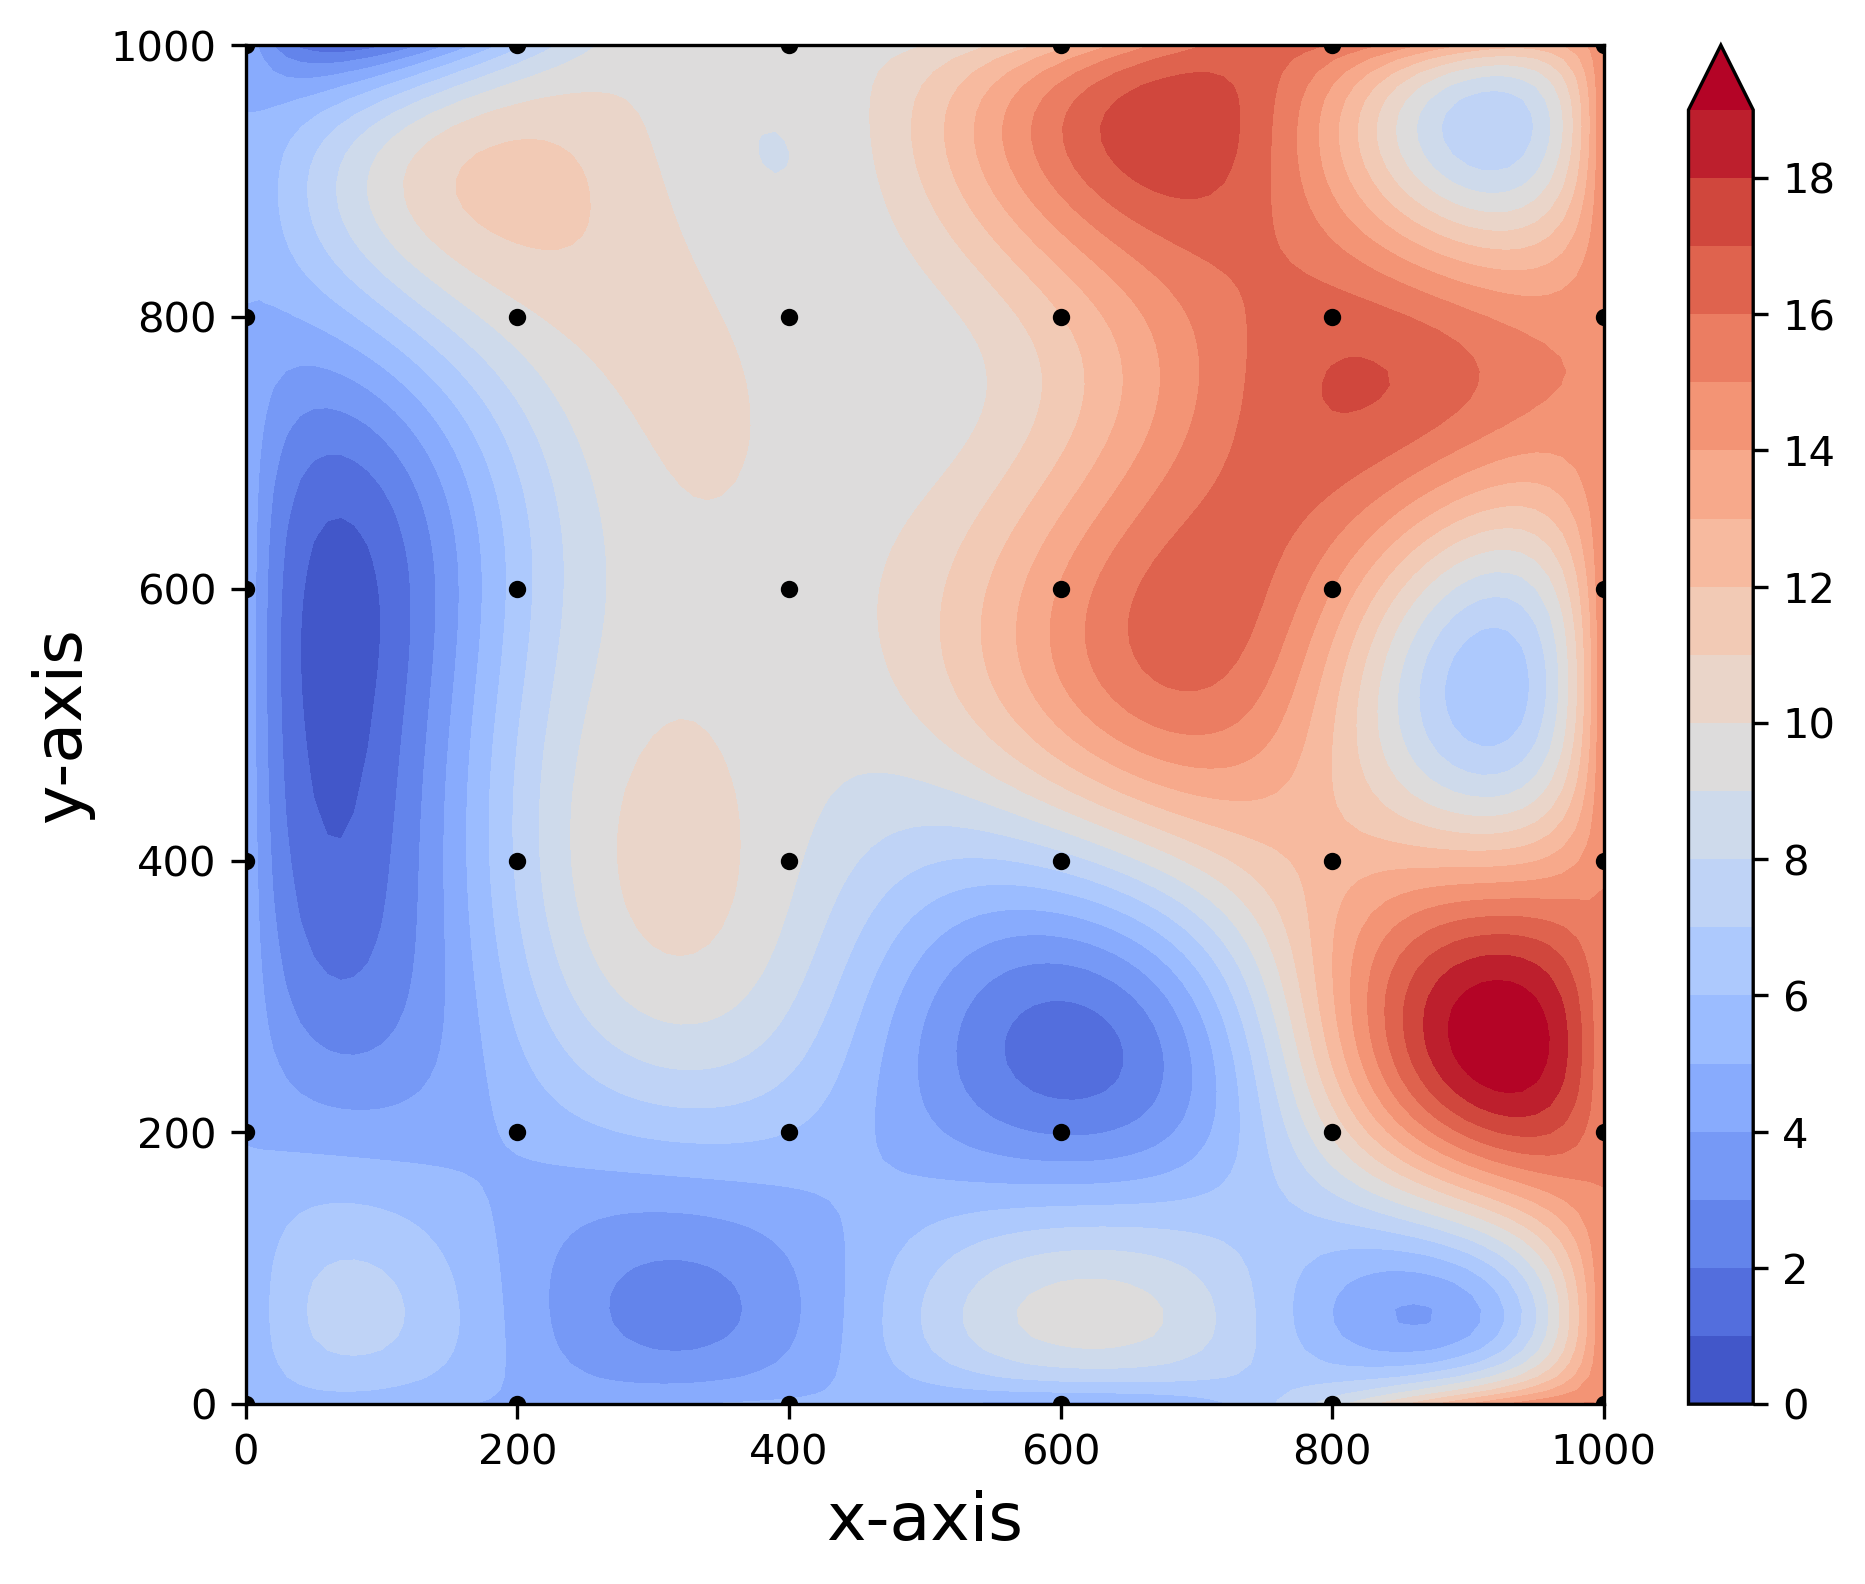

In [49]:
Wind = A
localisation = []
X = []
Y = []
for i in range(101):
    X.append(i * 1000/100)
    Y.append(i* 1000/100)
    for j in range(101):
        localisation.append( (i* 1000/100, j*1000/100) )

prediction_magnitude = Wind._get_magnitude(localisation)
prediction_direction = Wind._get_direction(localisation)
Z_magnitude = np.zeros( (len(Y), len(X)) )
# Z_direction = np.zeros( (len(Y), len(X)) )
for i in range(len(prediction_magnitude)):
    row = i % len(Y)
    col = i // len(Y)
    Z_magnitude[row, col] = prediction_magnitude[i]
    # Z_direction[row, col] = prediction_direction[i]

fig = plt.figure(figsize = (7.3, 6), dpi = 300)
plt.contourf(X, Y, Z_magnitude, 20, cmap='coolwarm', extend = 'max')
cb = plt.colorbar()
#cb.set_label(label='MAGNITUDE (km/h)',weight='bold')



X = [0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000]
Y = [0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 200, 200, 400, 400, 400, 400, 400, 400, 600, 600, 600, 600, 600, 600, 800, 800, 800, 800, 800, 800, 1000, 1000, 1000, 1000, 1000, 1000]

plt.scatter(X, Y, color = 'black', s = 10)
plt.ylabel('y-axis', fontsize = 16)
plt.xlabel('x-axis', fontsize = 16)
plt.axis('equal')



plt.savefig('z_magnitude.png')
plt.show()
plt.close(fig)

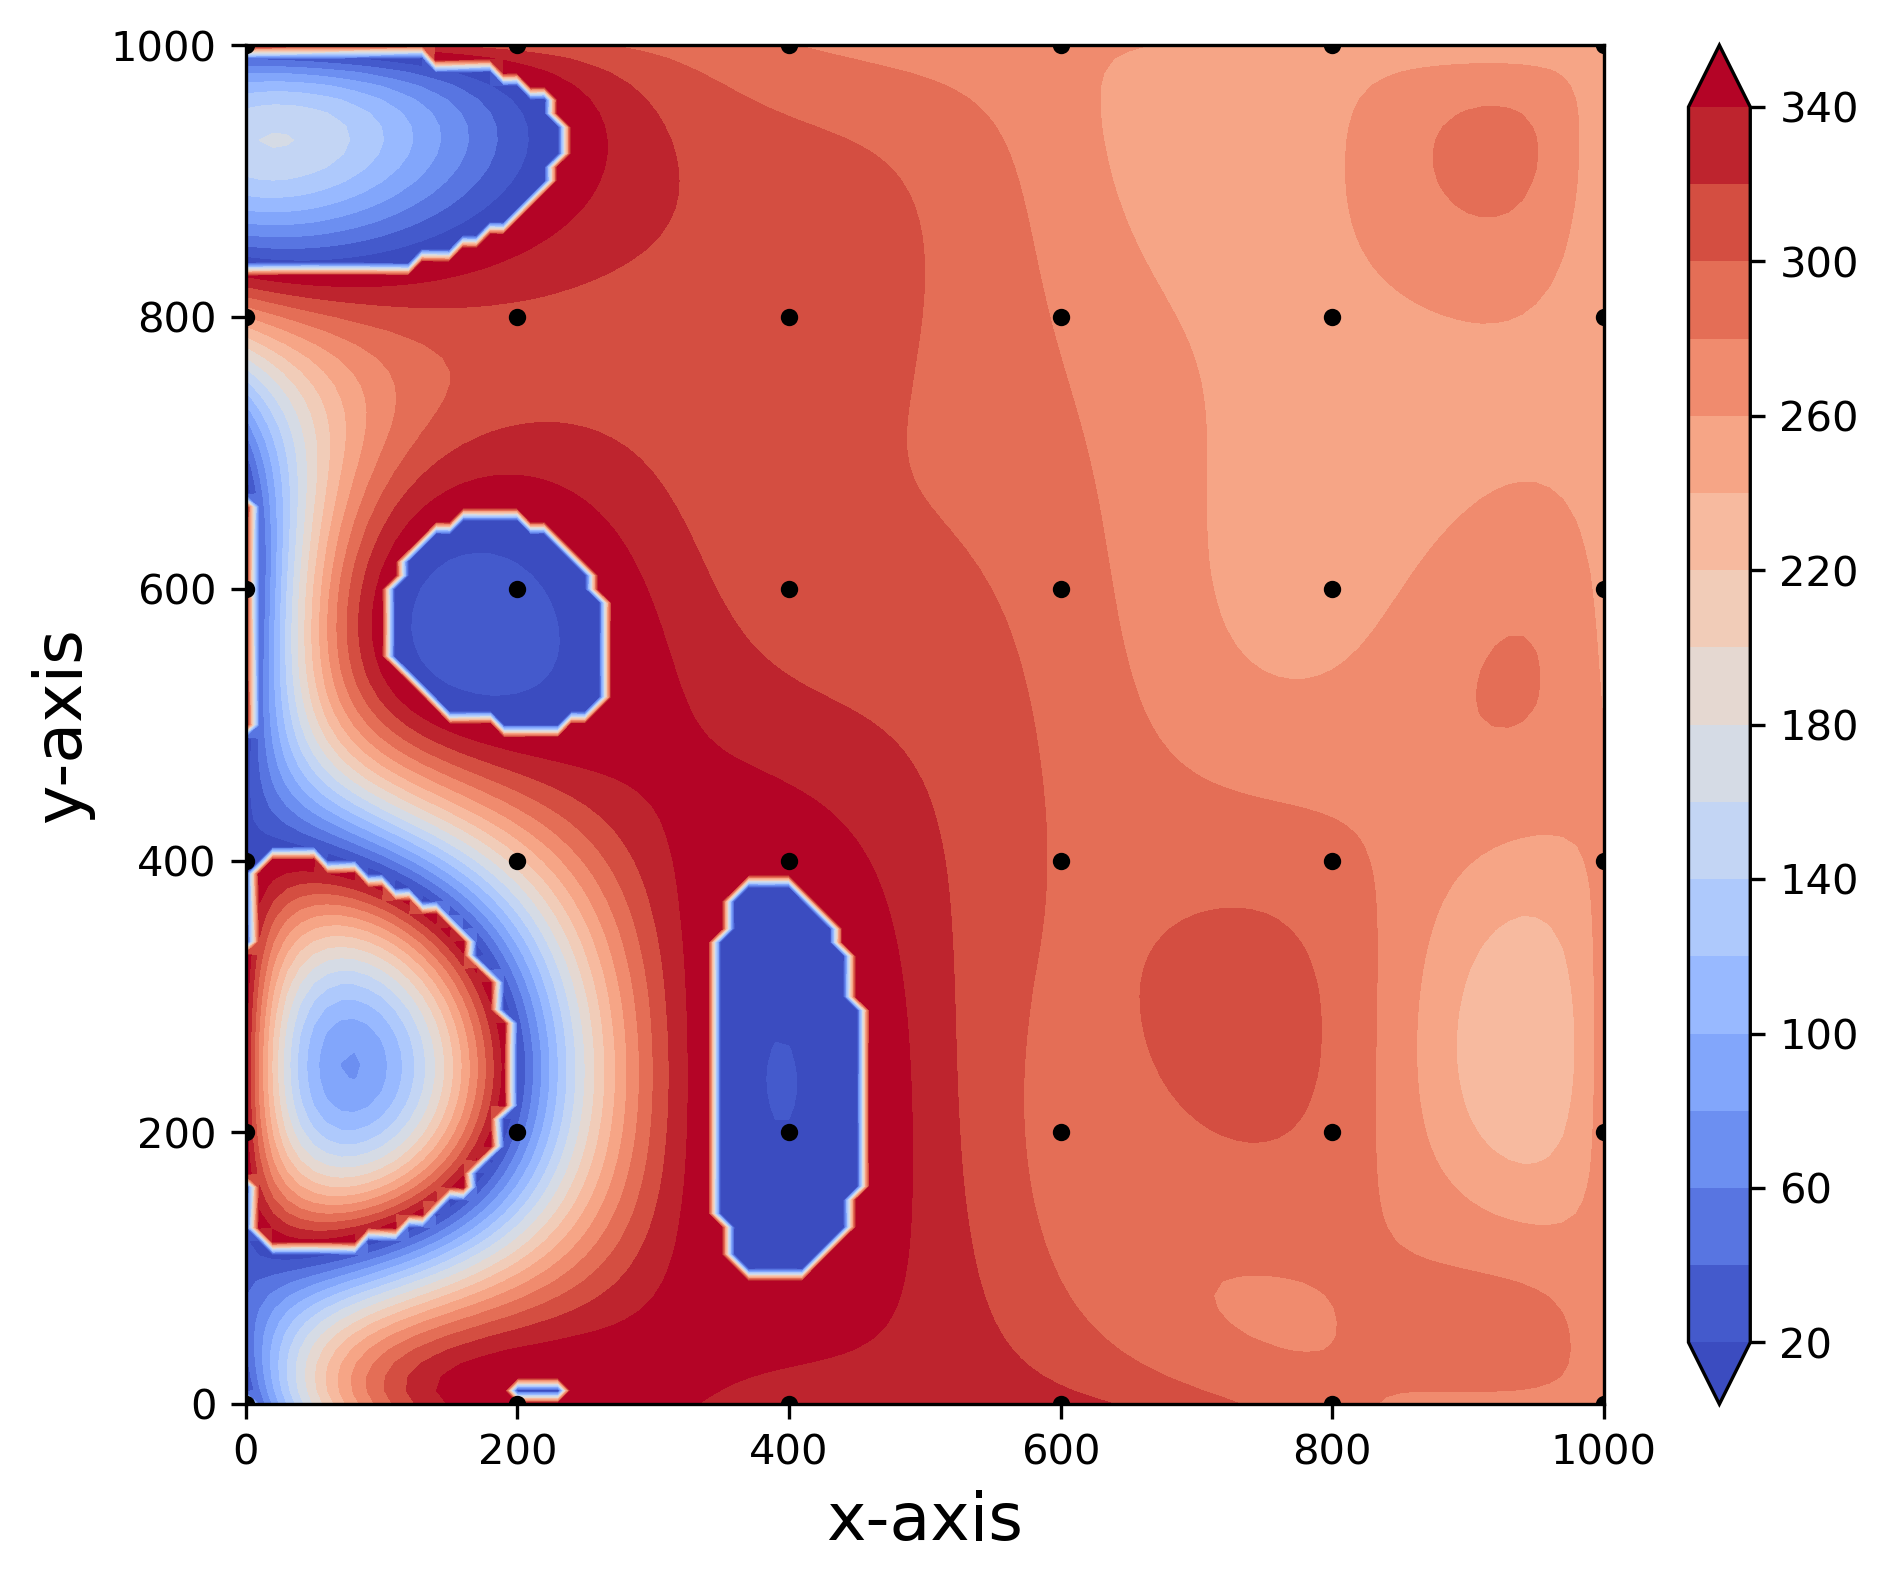

In [48]:
Wind = A
localisation = []
X = []
Y = []
for i in range(101):
    X.append(i * 1000/100)
    Y.append(i* 1000/100)
    for j in range(101):
        localisation.append( (i* 1000/100, j*1000/100) )

prediction_magnitude = Wind._get_magnitude(localisation)
prediction_direction = Wind._get_direction(localisation)
Z_direction = np.zeros( (len(Y), len(X)) )
# Z_direction = np.zeros( (len(Y), len(X)) )
for i in range(len(prediction_magnitude)):
    row = i % len(Y)
    col = i // len(Y)
    Z_direction[row, col] = prediction_direction[i]%360

fig = plt.figure(figsize=(7.3, 6), dpi = 300)
plt.contourf(X, Y, Z_direction, 20, cmap='coolwarm', extend='both')
cb = plt.colorbar()
#cb.set_label(label='Direction (°)',weight='bold', fontsize = 18)



X = [0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000]
Y = [0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 200, 200, 400, 400, 400, 400, 400, 400, 600, 600, 600, 600, 600, 600, 800, 800, 800, 800, 800, 800, 1000, 1000, 1000, 1000, 1000, 1000]

plt.scatter(X, Y, color = 'black', s = 10)
plt.ylabel('y-axis', fontsize = 16)
plt.xlabel('x-axis', fontsize = 16)
plt.axis('equal')
plt.savefig('z_direction.png')
plt.show()
plt.close(fig)

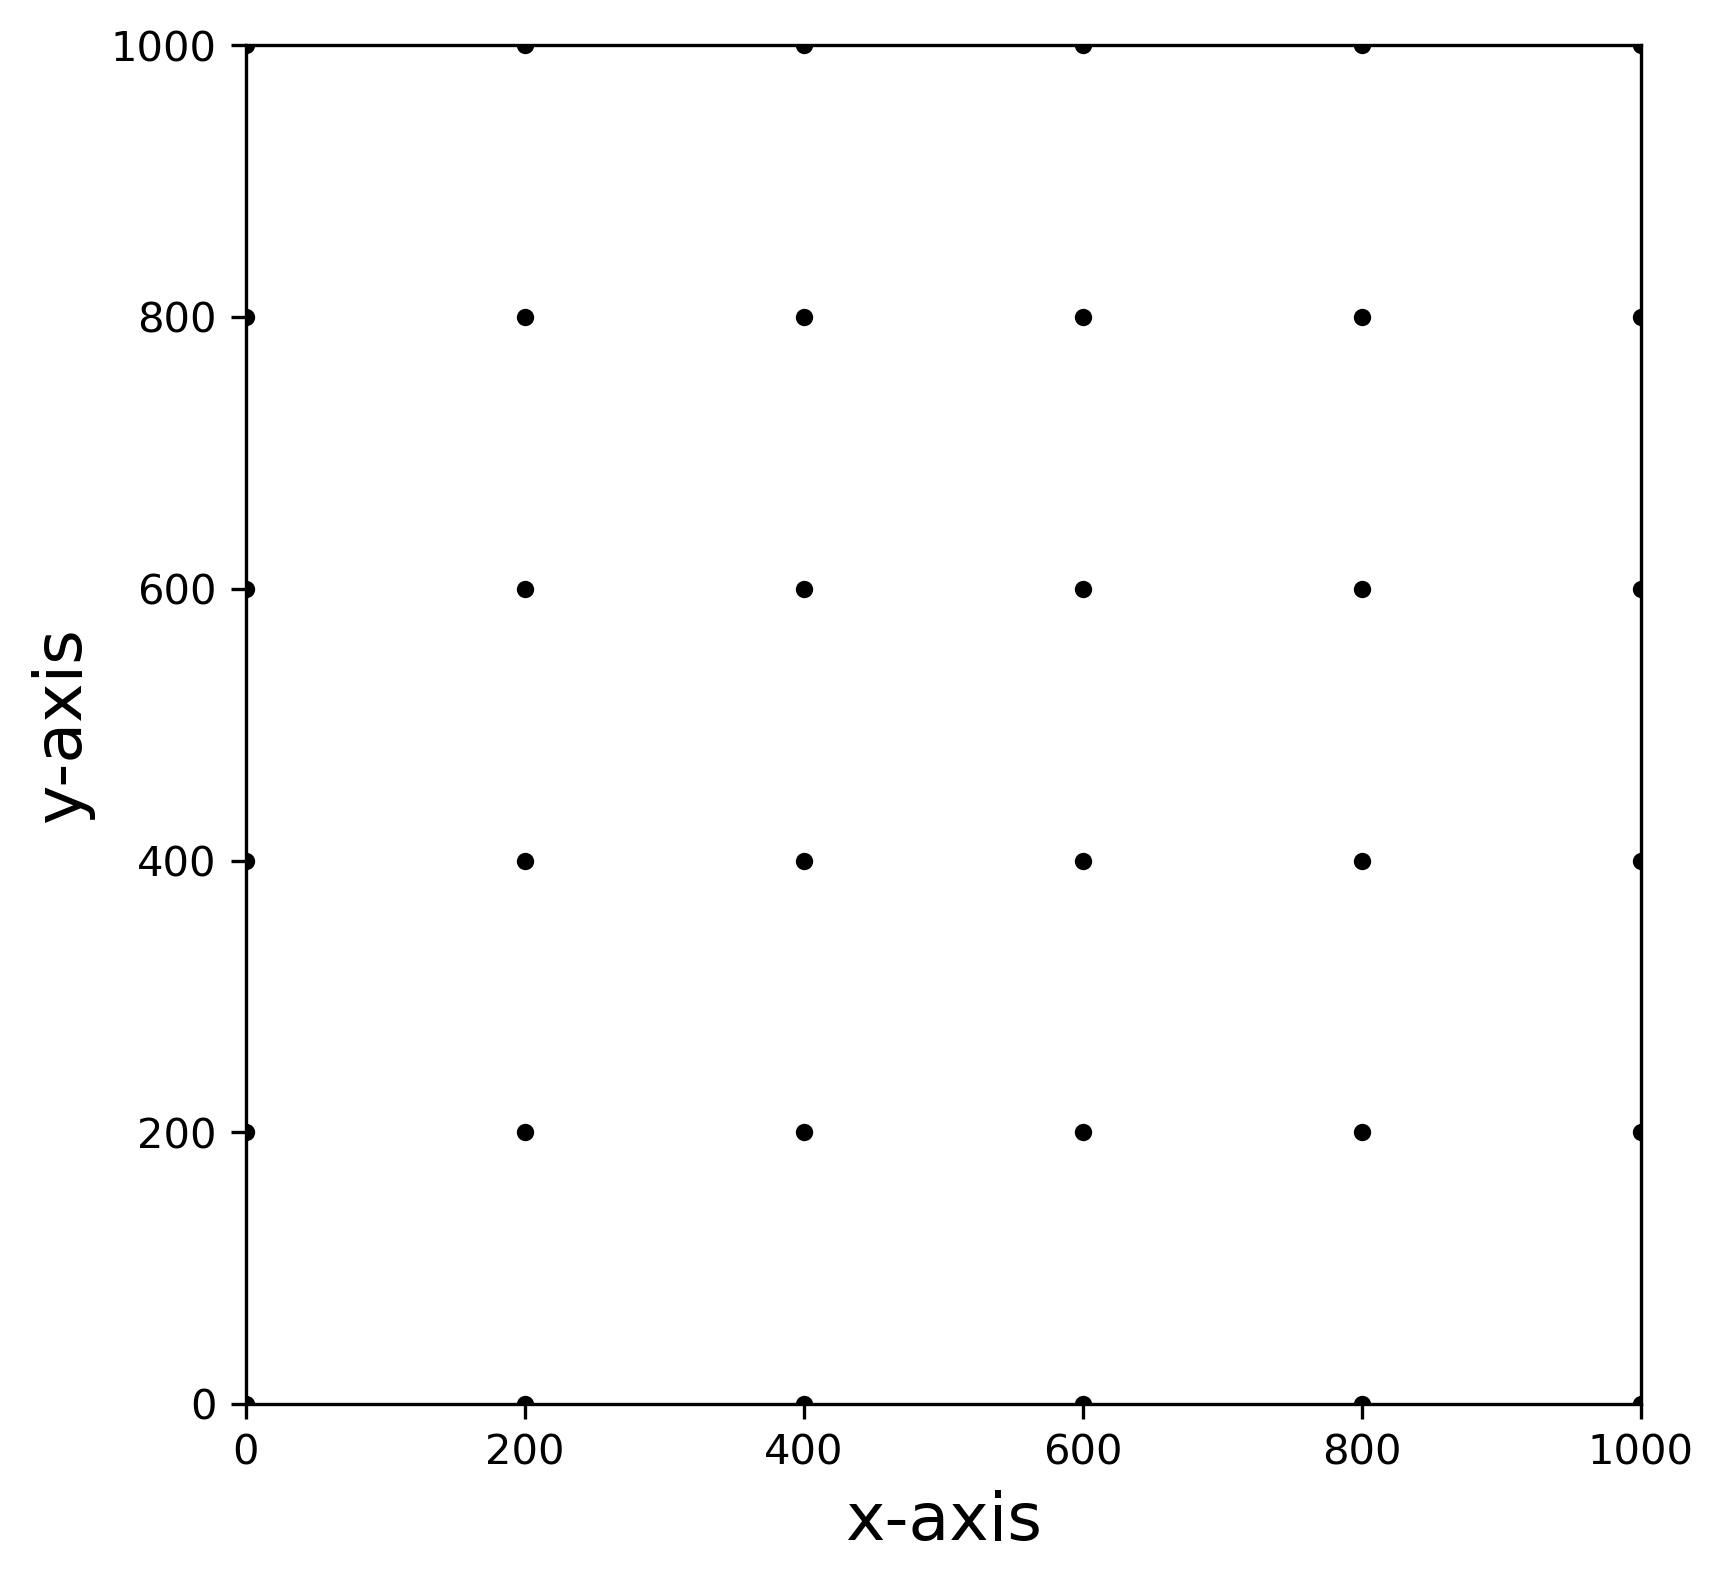

In [50]:
fig = plt.figure(figsize=(6, 6), dpi = 300)

X = [0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000, 0, 200, 400, 600, 800, 1000]
Y = [0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 200, 200, 400, 400, 400, 400, 400, 400, 600, 600, 600, 600, 600, 600, 800, 800, 800, 800, 800, 800, 1000, 1000, 1000, 1000, 1000, 1000]

plt.scatter(X, Y, color = 'black', s = 10)
plt.ylabel('y-axis', fontsize = 16)
plt.xlabel('x-axis', fontsize = 16)
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.savefig('z.png')
plt.show()
plt.close(fig)